# Prediction original adult data set

## Imports

Importing needed packages:

In [83]:
import pandas 
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# turn of warnings
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [84]:
train= pandas.read_csv('../cleaned/adult_data.csv', index_col=0);
test= pandas.read_csv('../cleaned/adult_test_data.csv', index_col=0);

train=train[train['Native-country']!=' Holand-Netherlands']

display(train.head())
display(test.head())

,Age,Workclass,fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Ethnicity,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,50k
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


,Age,Workclass,fnlwgt,Education,Education-number,Marital-status,Occupation,Relationship,Ethnicity,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,50k
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.


Follwing attributes will be taken as predictor:

Age, Workclass, Education, Occupation, Ethnicity, Sex, Hours-per-week and Native-country

The attribute 50k is the target attribute.

## Data preparation

First, we will extract the predictors, labels and the target for the train and for the test dataset and also apply One-Hot Encoding for categorical attributes:

In [85]:
train_predictors = train.drop(['fnlwgt','Marital-status','Relationship','Capital-gain','Capital-loss','50k'],axis=1)
train_target = train['50k'].astype('category')

test_predictors = test.drop(['fnlwgt','Marital-status','Relationship','Capital-gain','Capital-loss','50k'],axis=1)
test_target = test['50k'].astype('category')


## One-Hot Encoding

enc=np.array(['Workclass', 'Education', 'Occupation','Ethnicity','Native-country'])

train_predictors= pandas.get_dummies(train_predictors,columns=enc)
test_predictors= pandas.get_dummies(test_predictors,columns=enc)

#Saving label names for later use
labels=list(train_predictors.columns)

## Transform binary categories to 0 and 1 
train_target = train_target.map({' <=50K': 0, ' >50K':1}).astype('category')
test_target = test_target.map({' <=50K.':0, ' >50K.':1}).astype('category')
test_predictors['Sex']=test_predictors['Sex'].map({' Male': 0, ' Female':1})
train_predictors['Sex']=train_predictors['Sex'].map({' Male': 0, ' Female':1})

## Transform everythin to np.array
train_predictors=np.array(train_predictors)
train_target=np.array(train_target)

test_predictors=np.array(test_predictors)
test_target=np.array(test_target)


## Random Forest

Finding right amount of trees:

In [86]:
rf_range = range(80, 100)

# list of scores from k_range
rf_scores = []

# 1. we will loop through reasonable values of k
for k in rf_range:
    # 2. run KNeighborsClassifier with k neighbours
    classifier = RandomForestClassifier(random_state=42,n_estimators=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(classifier, train_predictors, train_target, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    rf_scores.append(scores.mean())
print(rf_scores)

[0.7844901987763417, 0.7839596728177813, 0.7843244602425337, 0.7842912597842993, 0.7847223492165087, 0.7845897452015942, 0.7848550301606546, 0.7844571301967893, 0.7849544886667855, 0.7849875902160086, 0.7848550081808743, 0.7849876341755693, 0.7847555276949629, 0.7847554837354022, 0.7848218077226399, 0.7850207796843527, 0.7848549202617529, 0.7848881317098775, 0.7847223382266186, 0.7853191881724164, 0.7853523556609804, 0.7856507091995931, 0.7853855451293247, 0.7850870926817002, 0.7851534496386084, 0.7853523556609804, 0.7849213761276725, 0.7849213211782217, 0.7851203041298249, 0.7852528861649591, 0.7851533836992673, 0.7853191661926361, 0.7844571411866795, 0.78482181871253, 0.784457108217009, 0.7847554727455119, 0.7850870926817003, 0.7847555276949628, 0.7847223602063989, 0.784722360206399, 0.7844239846880058, 0.7844239736981157, 0.7846892037077252, 0.784457108217009, 0.7849212991984412, 0.7844902647156827, 0.7846228797204875, 0.7847223382266185, 0.784689192717835, 0.7846892037077252, 0.784

Text(0, 0.5, 'Cross-Validated Accuracy')

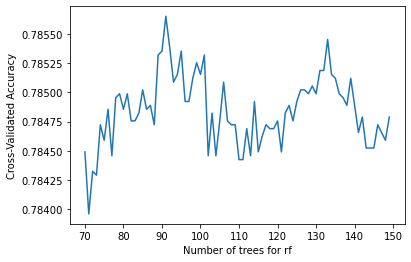

In [87]:
plt.plot(rf_range, rf_scores)
plt.xlabel('Number of trees for rf')
plt.ylabel('Cross-Validated Accuracy')

#### Prediction

In [88]:
classifier = RandomForestClassifier(random_state=42,n_estimators=92)
classifier = classifier.fit(train_predictors,train_target)
prediction = classifier.predict(test_predictors)
difference = test_target-prediction

In [89]:
feature_importances = pandas.DataFrame(classifier.feature_importances_,
                                   index = labels,
                                    columns=['importance']).sort_values('importance',ascending=False)
display(feature_importances.head(20))

,importance
Age,0.395334
Hours-per-week,0.179583
Education-number,0.075934
Sex,0.048718
Occupation_ Exec-managerial,0.026407
Occupation_ Prof-specialty,0.017732
Workclass_ Private,0.013582
Education_ Bachelors,0.013355
Occupation_ Other-service,0.013276
Education_ Masters,0.012048


#### Metrics

In [90]:
print('Total number of predictions:' + str(len(prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(difference))) 
print('Accuracy: '+ str(((len(prediction) - np.count_nonzero(difference))/len(prediction))*100)+' %')

Total number of predictions:15060
Total number of wrong predictions:3342
Accuracy: 77.80876494023904 %


In [91]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,10005,1355
Actual Positive,1987,1713


In [92]:
#metrics
print(classification_report(test_target, prediction,target_names=['0','1']))
f1_score(test_target,prediction, average='binary')

              precision    recall  f1-score   support

           0       0.83      0.88      0.86     11360
           1       0.56      0.46      0.51      3700

    accuracy                           0.78     15060
   macro avg       0.70      0.67      0.68     15060
weighted avg       0.77      0.78      0.77     15060



0.5062056737588653

## Naive Bayes
Train & predict with model

In [93]:
model = CategoricalNB()
model = model.fit(train_predictors,train_target)

naive_prediction= model.predict(test_predictors)
naive_difference = naive_prediction - test_target

#### Prediction

In [94]:
print('Total number of predictions:' + str(len(naive_prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(naive_difference))) 
print('Accuracy: '+ str(((len(naive_prediction) - np.count_nonzero(naive_difference))/len(naive_prediction))*100)+' %')
print("Accuracy:",metrics.accuracy_score(test_target, naive_prediction))


Total number of predictions:15060
Total number of wrong predictions:3297
Accuracy: 78.10756972111554 %
Accuracy: 0.7810756972111553


In [95]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,naive_prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,9569,1791
Actual Positive,1506,2194


In [96]:
#metrics
print(classification_report(test_target, naive_prediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     11360
           1       0.55      0.59      0.57      3700

    accuracy                           0.78     15060
   macro avg       0.71      0.72      0.71     15060
weighted avg       0.79      0.78      0.78     15060



## KNN 
Finding the right k

In [97]:
k_range = range(1, 25)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, train_predictors, train_target, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7400619741887043, 0.7748417675611851, 0.766884669454875, 0.7828323188932037, 0.7772290904151453, 0.7852197846157363, 0.78366140719829, 0.7898283291234729, 0.786612214691461, 0.7915191457074807, 0.7879050763621529, 0.7901928967504215, 0.7897286727993185, 0.7915190467984691, 0.7907894719489647, 0.7916183844158082, 0.7915521373578018, 0.793740246472465, 0.7919498724733143, 0.7954644393529503, 0.792745936158409, 0.7947683287190447, 0.7935414723287753, 0.794171423823796]


Text(0, 0.5, 'Cross-Validated Accuracy')

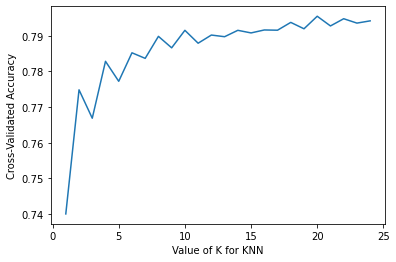

In [98]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Prediction

Train and predict with model

In [99]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(train_predictors, train_target)

knn_prediction=knn_model.predict(test_predictors)
knn_difference = knn_prediction - test_target

In [100]:
print('Total number of predictions:' + str(len(knn_prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(knn_difference))) 
print('Accuracy: '+ str(((len(knn_prediction) - np.count_nonzero(knn_difference))/len(knn_prediction))*100)+' %')
print("Accuracy:",metrics.accuracy_score(test_target, knn_prediction))


Total number of predictions:15060
Total number of wrong predictions:3235
Accuracy: 78.51925630810092 %
Accuracy: 0.7851925630810093


In [101]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,knn_prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,10082,1278
Actual Positive,1957,1743


In [102]:
#metrics
print(classification_report(test_target, knn_prediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     11360
           1       0.58      0.47      0.52      3700

    accuracy                           0.79     15060
   macro avg       0.71      0.68      0.69     15060
weighted avg       0.77      0.79      0.78     15060



## Voting Classifier
Train & predict with model

In [103]:
voting_pred=[]
i=0
while i < len(prediction):
    tmp=prediction[i]+naive_prediction[i]+knn_prediction[i]
    if tmp>1:
        voting_pred.append(1)
    else:
        voting_pred.append(0)
    i += 1
voting_diff=voting_pred-test_target

#### Prediction

In [104]:
print('Total number of predictions:' + str(len(voting_pred)))
print('Total number of wrong predictions:' + str(np.count_nonzero(voting_diff))) 
print('Accuracy: '+ str(((len(knn_prediction) - np.count_nonzero(voting_diff))/len(voting_pred))*100)+' %')
print("Accuracy:",metrics.accuracy_score(test_target, voting_pred))


Total number of predictions:15060
Total number of wrong predictions:3073
Accuracy: 79.59495351925631 %
Accuracy: 0.7959495351925631


In [105]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,voting_pred)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,10100,1260
Actual Positive,1813,1887


In [106]:
#metrics
print(classification_report(test_target, voting_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11360
           1       0.60      0.51      0.55      3700

    accuracy                           0.80     15060
   macro avg       0.72      0.70      0.71     15060
weighted avg       0.79      0.80      0.79     15060

